# INFO 664 FINAL
Mapping by degree type / normalized by population / by county

In [34]:
# call libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import chart_studio
import chart_studio.plotly as py
import kaleido
import plotly.io as pio
import numpy as np
import numexpr as ne
import matplotlib
import matplotlib as plotly
from matplotlib.pyplot import figure
import geopandas as gpd
# allows to use quantiles with mapped data
import mapclassify

/Users/djferrera/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [13]:
# read in csv
degree_type = pd.read_csv("/Users/djferrera/Documents/DIANE/Pratt/04-Fall-2021/INFO-664/00-final-project/data/CENSUS/2019ACS-Degrees-County.csv")


In [12]:
degree_type.head()

,id,GEOID,County,State,TotPopDegree,PopSciEng,PopBus,PopEdu,PopArtsHumOth
0,0500000US01001,1001,Autauga County,Alabama,9929,2068,2335,1644,2197
1,0500000US01003,1003,Baldwin County,Alabama,48148,18882,10960,8129,10177
2,0500000US01005,1005,Barbour County,Alabama,2080,633,442,663,342
3,0500000US01007,1007,Bibb County,Alabama,1678,516,433,361,368
4,0500000US01009,1009,Blount County,Alabama,5210,1985,817,1299,1109


In [16]:
# add leading zero back to GEOID
# check data types
degree_type.dtypes

id               object
GEOID             int64
County           object
State            object
TotPopDegree      int64
PopSciEng         int64
PopBus            int64
PopEdu            int64
PopArtsHumOth     int64
dtype: object

In [17]:
# convert GEOID to string
degree_type['GEOID'] = degree_type['GEOID'].astype(str)

In [18]:
# add leading zero back to GEOID
degree_type['GEOID'] = degree_type['GEOID'].str.zfill(5)

In [20]:
degree_type.head()

,id,GEOID,County,State,TotPopDegree,PopSciEng,PopBus,PopEdu,PopArtsHumOth
0,0500000US01001,01001,Autauga County,Alabama,9929,2068,2335,1644,2197
1,0500000US01003,01003,Baldwin County,Alabama,48148,18882,10960,8129,10177
2,0500000US01005,01005,Barbour County,Alabama,2080,633,442,663,342
3,0500000US01007,01007,Bibb County,Alabama,1678,516,433,361,368
4,0500000US01009,01009,Blount County,Alabama,5210,1985,817,1299,1109


In [21]:
# need to bring in county population in order to normalize
pop_county = pd.read_csv("/Users/djferrera/Documents/DIANE/Pratt/04-Fall-2021/INFO-664/00-final-project/data/CENSUS/2019ACS-Population-County.csv")

In [22]:
pop_county.head()

,id,GEOID,County,State,TotPop
0,0500000US01001,1001,Autauga County,Alabama,55380
1,0500000US01003,1003,Baldwin County,Alabama,212830
2,0500000US01005,1005,Barbour County,Alabama,25361
3,0500000US01007,1007,Bibb County,Alabama,22493
4,0500000US01009,1009,Blount County,Alabama,57681


In [23]:
# convert GEOID to string
pop_county['GEOID'] = pop_county['GEOID'].astype(str)

In [24]:
# add leading zero back to GEOID
pop_county['GEOID'] = pop_county['GEOID'].str.zfill(5)

In [25]:
pop_county.head()

,id,GEOID,County,State,TotPop
0,0500000US01001,01001,Autauga County,Alabama,55380
1,0500000US01003,01003,Baldwin County,Alabama,212830
2,0500000US01005,01005,Barbour County,Alabama,25361
3,0500000US01007,01007,Bibb County,Alabama,22493
4,0500000US01009,01009,Blount County,Alabama,57681


In [26]:
# merge data frames
cnty_pop_degree = pd.merge(degree_type, pop_county, on=["GEOID","County","State"])

In [28]:
cnty_pop_degree.head()

,id_x,GEOID,County,State,TotPopDegree,PopSciEng,PopBus,PopEdu,PopArtsHumOth,id_y,TotPop
0,0500000US01001,01001,Autauga County,Alabama,9929,2068,2335,1644,2197,0500000US01001,55380
1,0500000US01003,01003,Baldwin County,Alabama,48148,18882,10960,8129,10177,0500000US01003,212830
2,0500000US01005,01005,Barbour County,Alabama,2080,633,442,663,342,0500000US01005,25361
3,0500000US01007,01007,Bibb County,Alabama,1678,516,433,361,368,0500000US01007,22493
4,0500000US01009,01009,Blount County,Alabama,5210,1985,817,1299,1109,0500000US01009,57681


In [29]:
# normalize degrees by population

# total degrees
cnty_pop_degree['PercTotDegrees']= ((cnty_pop_degree.TotPopDegree/
                                                cnty_pop_degree.TotPop)*100)

# SciEng degrees
cnty_pop_degree['PercSciEng']= ((cnty_pop_degree.PopSciEng/
                                                cnty_pop_degree.TotPop)*100)

# Bus degrees
cnty_pop_degree['PercBus']= ((cnty_pop_degree.PopBus/
                                                cnty_pop_degree.TotPop)*100)

# Edu degrees
cnty_pop_degree['PercEdu']= ((cnty_pop_degree.PopEdu/
                                                cnty_pop_degree.TotPop)*100)

# ArtsEtc degrees
cnty_pop_degree['PercArtsEct']= ((cnty_pop_degree.PopArtsHumOth/
                                                cnty_pop_degree.TotPop)*100)

In [31]:
# change data type to integer to round numbers

cnty_pop_degree['PercTotDegrees'] = cnty_pop_degree['PercTotDegrees'].astype(int)
cnty_pop_degree['PercSciEng'] = cnty_pop_degree['PercSciEng'].astype(int)
cnty_pop_degree['PercBus'] = cnty_pop_degree['PercBus'].astype(int)
cnty_pop_degree['PercEdu'] = cnty_pop_degree['PercEdu'].astype(int)
cnty_pop_degree['PercArtsEct'] = cnty_pop_degree['PercArtsEct'].astype(int)

In [32]:
cnty_pop_degree.head()

,id_x,GEOID,County,State,TotPopDegree,PopSciEng,PopBus,PopEdu,PopArtsHumOth,id_y,TotPop,PercTotDegrees,PercSciEng,PercBus,PercEdu,PercArtsEct
0,0500000US01001,01001,Autauga County,Alabama,9929,2068,2335,1644,2197,0500000US01001,55380,17,3,4,2,3
1,0500000US01003,01003,Baldwin County,Alabama,48148,18882,10960,8129,10177,0500000US01003,212830,22,8,5,3,4
2,0500000US01005,01005,Barbour County,Alabama,2080,633,442,663,342,0500000US01005,25361,8,2,1,2,1
3,0500000US01007,01007,Bibb County,Alabama,1678,516,433,361,368,0500000US01007,22493,7,2,1,1,1
4,0500000US01009,01009,Blount County,Alabama,5210,1985,817,1299,1109,0500000US01009,57681,9,3,1,2,1


In [45]:
# bring in spatial data
# Read in TIGER Census file - 2019 counties

counties_2019 = gpd.read_file('/Users/djferrera/Documents/DIANE/Pratt/04-Fall-2021/INFO-664/00-final-project/data/Census-2019-5YACS/tl_2019_us_county/tl_2019_us_county.shp')


In [46]:
# preview
counties_2019.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680962890,61582307,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."


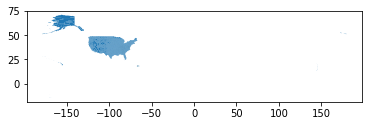

In [47]:
# plot
counties_2019.plot()

In [48]:
# check CRS
counties_2019.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [49]:
# change CRS
counties_2019 = counties_2019.to_crs("EPSG:5070")

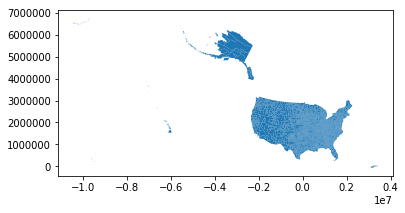

In [50]:
counties_2019.plot()

In [51]:
# merge spatial data and degree/pop
# list spatial DF first!

# merge DFs
counties_degrees = pd.merge(counties_2019, cnty_pop_degree, on=['GEOID'], how="inner", indicator=False)

In [56]:
counties_degrees.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,PopBus,PopEdu,PopArtsHumOth,id_y,TotPop,PercTotDegrees,PercSciEng,PercBus,PercEdu,PercArtsEct
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,...,215,461,193,0500000US31039,8952,16,6,2,5,2
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,...,40,127,206,0500000US53069,4268,14,6,0,2,4
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,...,24,67,16,0500000US35011,2040,7,2,1,3,0
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,...,15922,12714,17863,0500000US31109,313158,24,9,5,4,5
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,...,130,181,35,0500000US31129,4244,15,6,3,4,0


In [57]:
counties_degrees.dtypes

STATEFP             object
COUNTYFP            object
COUNTYNS            object
GEOID               object
NAME                object
NAMELSAD            object
LSAD                object
CLASSFP             object
MTFCC               object
CSAFP               object
CBSAFP              object
METDIVFP            object
FUNCSTAT            object
ALAND                int64
AWATER               int64
INTPTLAT            object
INTPTLON            object
geometry          geometry
id_x                object
County              object
State               object
TotPopDegree         int64
PopSciEng            int64
PopBus               int64
PopEdu               int64
PopArtsHumOth        int64
id_y                object
TotPop               int64
PercTotDegrees       int64
PercSciEng           int64
PercBus              int64
PercEdu              int64
PercArtsEct          int64
dtype: object

In [54]:
counties_degrees.shape

(3142, 33)

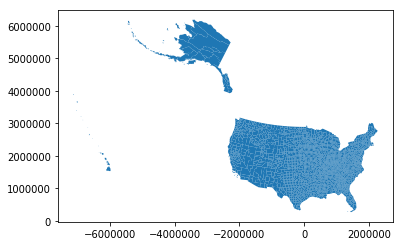

In [52]:
counties_degrees.plot()

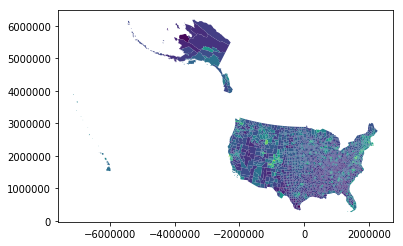

In [58]:
# map by total degree percent

counties_degrees.plot(column='PercTotDegrees');

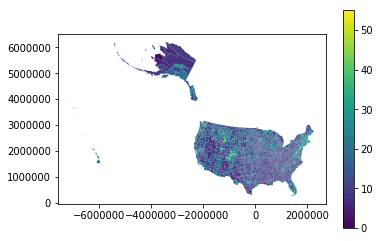

In [60]:
# add a legend

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

counties_degrees.plot(column='PercTotDegrees', ax=ax, legend=True)

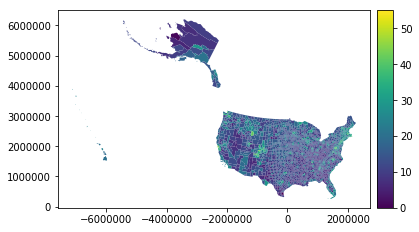

In [61]:
# Plot population estimates with an accurate legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

counties_degrees.plot(column='PercTotDegrees', ax=ax, legend=True, cax=cax)

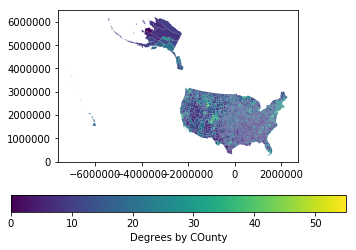

In [62]:
# accurate legend
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

counties_degrees.plot(column='PercTotDegrees',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Degrees by COunty",
                        'orientation': "horizontal"})


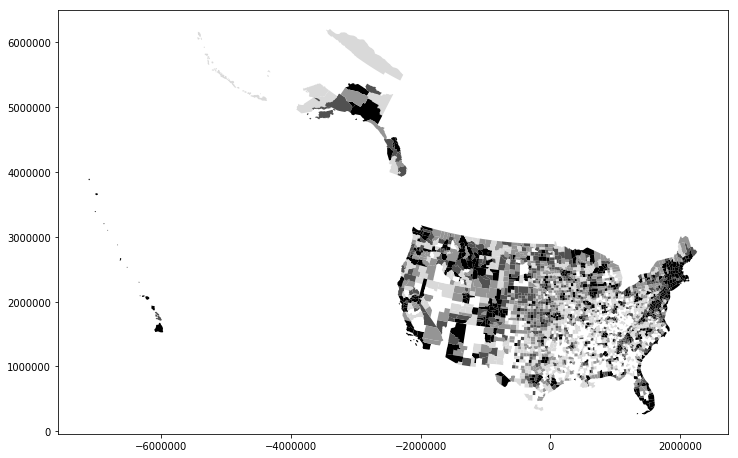

In [167]:
counties_degrees.plot(column='PercTotDegrees', cmap='Greys', scheme='quantiles', k=5, figsize=(12,8));

In [168]:
# look at quantiles
q5 = mapclassify.Quantiles(counties_degrees.PercTotDegrees,k=5)
q5

Quantiles             

   Interval      Count
----------------------
[ 0.00,  9.00] |   641
( 9.00, 12.00] |   770
(12.00, 15.00] |   665
(15.00, 19.00] |   491
(19.00, 55.00] |   575

In [169]:
# create better legend
q5.get_legend_classes()

['[ 0.00,  9.00]',
 '( 9.00, 12.00]',
 '(12.00, 15.00]',
 '(15.00, 19.00]',
 '(19.00, 55.00]']

In [170]:
mapping5 = dict([(i,s) for i,s in enumerate(q5.get_legend_classes())])
mapping5

{0: '[ 0.00,  9.00]',
 1: '( 9.00, 12.00]',
 2: '(12.00, 15.00]',
 3: '(15.00, 19.00]',
 4: '(19.00, 55.00]'}

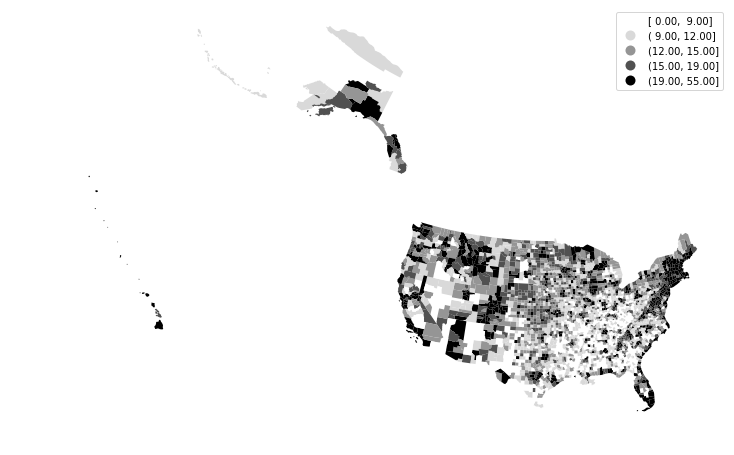

In [171]:
def replace_legend_items(legend, mapping5):
    for txt in legend.texts:
        for k,v in mapping5.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(12, 8))
counties_degrees.assign(PercTotDegrees=q5.yb).plot(column='PercTotDegrees', categorical=True, \
        k=5, cmap='Greys', linewidth=0, ax=ax, \
        edgecolor='white', legend=True,
                          legend_kwds={'loc': 'upper right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping5)

# save figure BEFORE you show it
# export map as PDF
plt.savefig("Degrees_Total.pdf")

plt.show()

defined breaks here - both opted to not use this technique and stick with standard breaks

In [67]:
# define the breaks
my_breaks = mapclassify.UserDefined(
    counties_degrees['PercTotDegrees'], [10,20,30,40,55]
)
my_breaks

UserDefined           

   Interval      Count
----------------------
[ 0.00, 10.00] |   908
(10.00, 20.00] |  1739
(20.00, 30.00] |   395
(30.00, 40.00] |    86
(40.00, 55.00] |    14

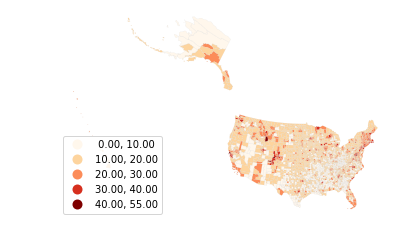

In [81]:
my_breaks.plot(
    counties_degrees,
    legend=True, 
    legend_kwds={
        'loc': 'lower left' 
    },
    # remove axis
    axis_on=False,  
    cmap='OrRd'         
);

# Sciene / Engineering Degrees

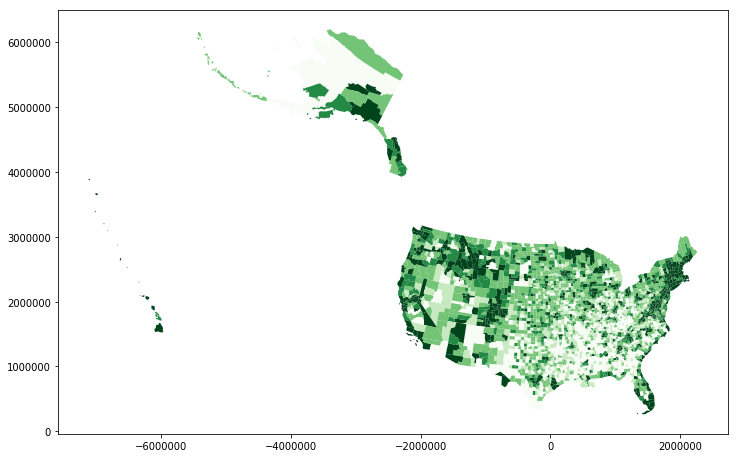

In [156]:
counties_degrees.plot(column='PercSciEng', cmap='Greens', scheme='quantiles', k=5, figsize=(12,8));

In [157]:
# look at quantiles
q5 = mapclassify.Quantiles(counties_degrees.PercSciEng,k=5)
q5

Quantiles             

   Interval      Count
----------------------
[ 0.00,  3.00] |   788
( 3.00,  4.00] |   537
( 4.00,  6.00] |   877
( 6.00,  8.00] |   418
( 8.00, 33.00] |   522

In [158]:
# create better legend
q5.get_legend_classes()

['[ 0.00,  3.00]',
 '( 3.00,  4.00]',
 '( 4.00,  6.00]',
 '( 6.00,  8.00]',
 '( 8.00, 33.00]']

In [159]:
mapping4 = dict([(i,s) for i,s in enumerate(q5.get_legend_classes())])
mapping4

{0: '[ 0.00,  3.00]',
 1: '( 3.00,  4.00]',
 2: '( 4.00,  6.00]',
 3: '( 6.00,  8.00]',
 4: '( 8.00, 33.00]'}

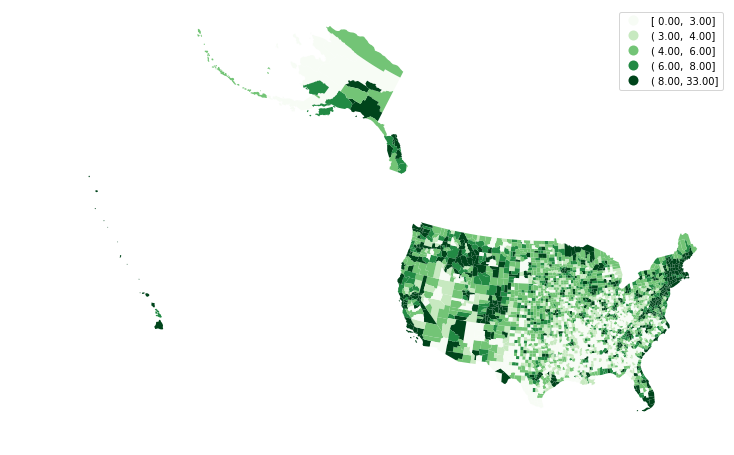

In [164]:
def replace_legend_items(legend, mapping4):
    for txt in legend.texts:
        for k,v in mapping4.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(12, 8))
counties_degrees.assign(PercSciEng=q5.yb).plot(column='PercSciEng', categorical=True, \
        k=5, cmap='Greens', linewidth=0, ax=ax, \
        edgecolor='white', legend=True,
                          legend_kwds={'loc': 'upper right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping4)

# save figure BEFORE you show it
# export map as PDF
plt.savefig("Degrees_SciEng.pdf")

plt.show()

defined breaks here - both opted to not use this technique and stick with standard breaks

In [89]:
# define the breaks
my_breaks2 = mapclassify.UserDefined(
    counties_degrees['PercSciEng'], [5,10,20,33]
)
my_breaks2

UserDefined           

   Interval      Count
----------------------
[ 0.00,  5.00] |  1820
( 5.00, 10.00] |  1030
(10.00, 20.00] |   276
(20.00, 33.00] |    16

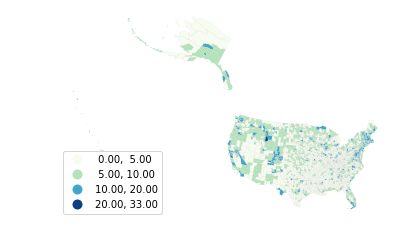

In [94]:
my_breaks2.plot(
    counties_degrees,
    legend=True, 
    legend_kwds={
        'loc': 'lower left' 
    },
    # remove axis
    axis_on=False,  
    cmap='GnBu'         
);

# Business Degrees

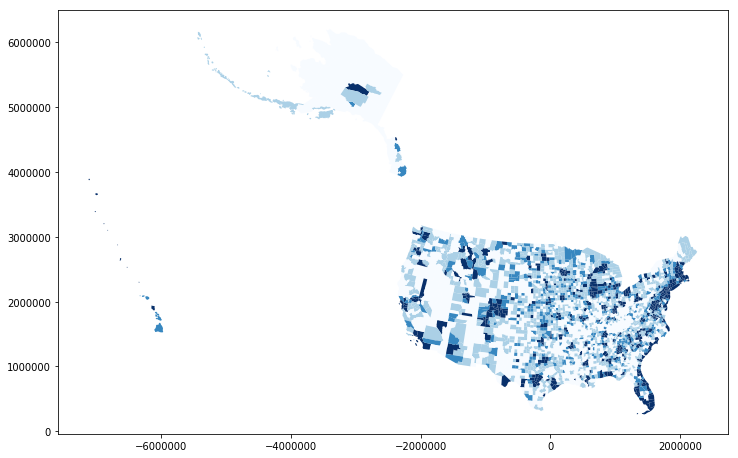

In [151]:
counties_degrees.plot(column='PercBus', cmap='Blues', scheme='quantiles', k=4, figsize=(12,8));

In [152]:
# look at quantiles
q4 = mapclassify.Quantiles(counties_degrees.PercBus,k=4)
q4

Quantiles             

   Interval      Count
----------------------
[ 0.00,  1.00] |  1162
( 1.00,  2.00] |  1002
( 2.00,  3.00] |   497
( 3.00, 10.00] |   481

defined breaks here - both opted to not use this technique and stick with standard breaks

In [153]:
# create better legend
q4.get_legend_classes()

['[ 0.00,  1.00]', '( 1.00,  2.00]', '( 2.00,  3.00]', '( 3.00, 10.00]']

In [154]:
mapping3 = dict([(i,s) for i,s in enumerate(q4.get_legend_classes())])
mapping3

{0: '[ 0.00,  1.00]',
 1: '( 1.00,  2.00]',
 2: '( 2.00,  3.00]',
 3: '( 3.00, 10.00]'}

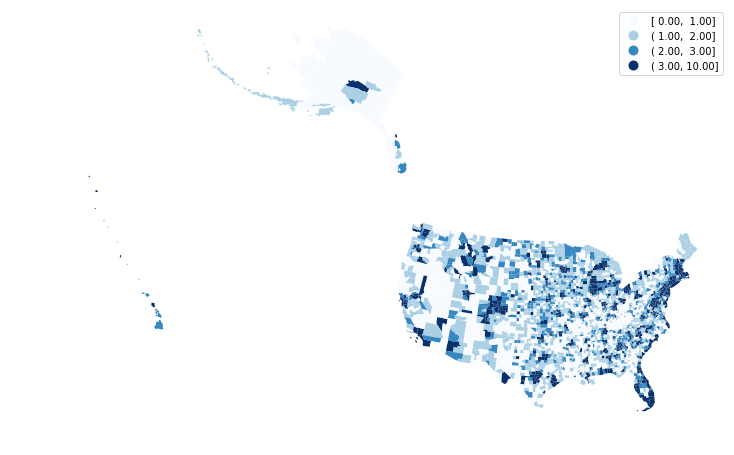

In [166]:
def replace_legend_items(legend, mapping3):
    for txt in legend.texts:
        for k,v in mapping3.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(12, 8))
counties_degrees.assign(PercBus=q4.yb).plot(column='PercBus', categorical=True, \
        k=4, cmap='Blues', linewidth=0, ax=ax, \
        edgecolor='white', legend=True,
                          legend_kwds={'loc': 'upper right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping3)

# save figure BEFORE you show it
# export map as PDF
plt.savefig("Degrees_Bus.pdf")

plt.show()

defined breaks here - both opted to not use this technique and stick with standard breaks

In [102]:
# define the breaks
my_breaks3 = mapclassify.UserDefined(
    counties_degrees['PercBus'], [1,2,3,10]
)
my_breaks3

UserDefined           

   Interval      Count
----------------------
[ 0.00,  1.00] |  1162
( 1.00,  2.00] |  1002
( 2.00,  3.00] |   497
( 3.00, 10.00] |   481

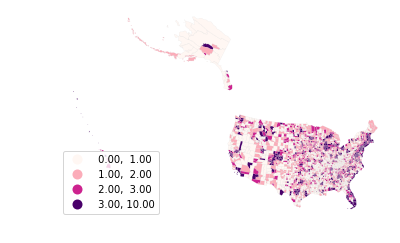

In [104]:
my_breaks3.plot(
    counties_degrees,
    legend=True, 
    legend_kwds={
        'loc': 'lower left' 
    },
    # remove axis
    axis_on=False,  
    cmap='RdPu'         
);

# Education Degrees

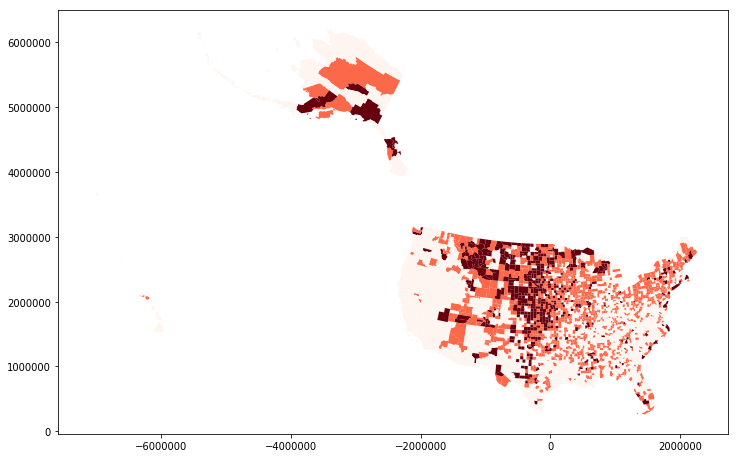

In [143]:
counties_degrees.plot(column='PercEdu', cmap='Reds', scheme='quantiles', k=3, figsize=(12,8));

In [144]:
# look at quantiles
q3 = mapclassify.Quantiles(counties_degrees.PercEdu,k=3)
q3

Quantiles           

  Interval     Count
--------------------
[0.00, 2.00] |  1678
(2.00, 3.00] |  1021
(3.00, 9.00] |   443

In [145]:
# create better legend
q3.get_legend_classes()

['[0.00, 2.00]', '(2.00, 3.00]', '(3.00, 9.00]']

In [146]:
mapping2 = dict([(i,s) for i,s in enumerate(q3.get_legend_classes())])
mapping2

{0: '[0.00, 2.00]', 1: '(2.00, 3.00]', 2: '(3.00, 9.00]'}

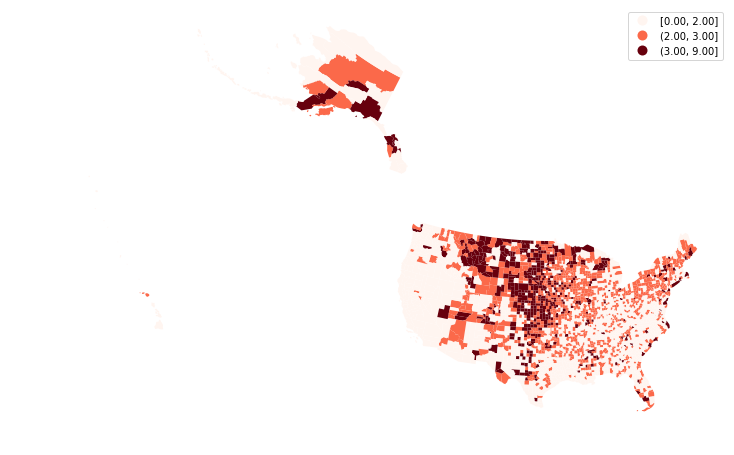

In [173]:
def replace_legend_items(legend, mapping2):
    for txt in legend.texts:
        for k,v in mapping2.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(12, 8))
counties_degrees.assign(PercEdu=q3.yb).plot(column='PercEdu', categorical=True, \
        k=3, cmap='Reds', linewidth=0, ax=ax, \
        edgecolor='white', legend=True,
                          legend_kwds={'loc': 'upper right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping2)

# save figure BEFORE you show it
# export map as PDF
plt.savefig("Degrees_Edu.pdf")

plt.show()

defined breaks here - both opted to not use this technique and stick with standard breaks

In [111]:
# define the breaks
my_breaks4 = mapclassify.UserDefined(
    counties_degrees['PercBus'], [1,2,3,10]
)
my_breaks4

UserDefined           

   Interval      Count
----------------------
[ 0.00,  1.00] |  1162
( 1.00,  2.00] |  1002
( 2.00,  3.00] |   497
( 3.00, 10.00] |   481

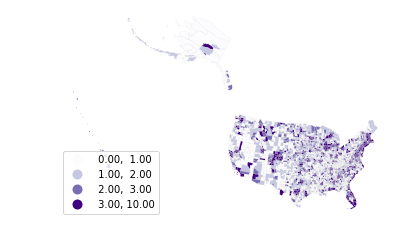

In [112]:
my_breaks4.plot(
    counties_degrees,
    legend=True, 
    legend_kwds={
        'loc': 'lower left' 
    },
    # remove axis
    axis_on=False,  
    cmap='Purples'         
);

# Arts / Humanities / Other Degrees

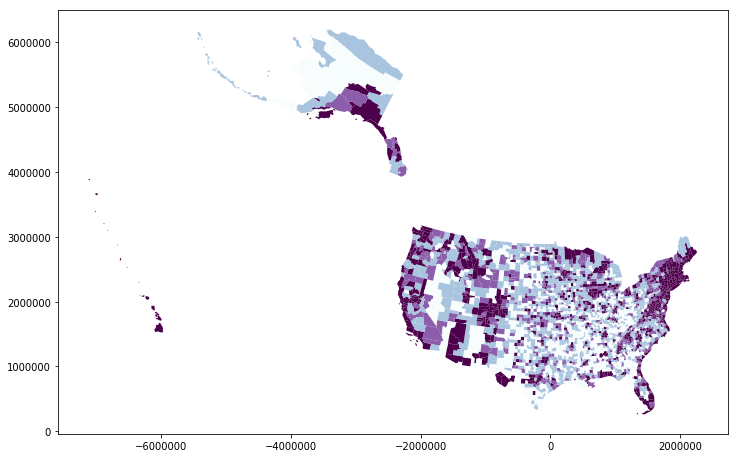

In [124]:
counties_degrees.plot(column='PercArtsEct', cmap='BuPu', scheme='quantiles', k=4, figsize=(12,8));

In [116]:
# look at quantiles
q4 = mapclassify.Quantiles(counties_degrees.PercArtsEct,k=4)
q4

Quantiles             

   Interval      Count
----------------------
[ 0.00,  1.00] |   925
( 1.00,  2.00] |  1001
( 2.00,  3.00] |   512
( 3.00, 16.00] |   704

In [118]:
# create better legend
q4.get_legend_classes()

['[ 0.00,  1.00]', '( 1.00,  2.00]', '( 2.00,  3.00]', '( 3.00, 16.00]']

In [119]:
mapping = dict([(i,s) for i,s in enumerate(q4.get_legend_classes())])
mapping

{0: '[ 0.00,  1.00]',
 1: '( 1.00,  2.00]',
 2: '( 2.00,  3.00]',
 3: '( 3.00, 16.00]'}

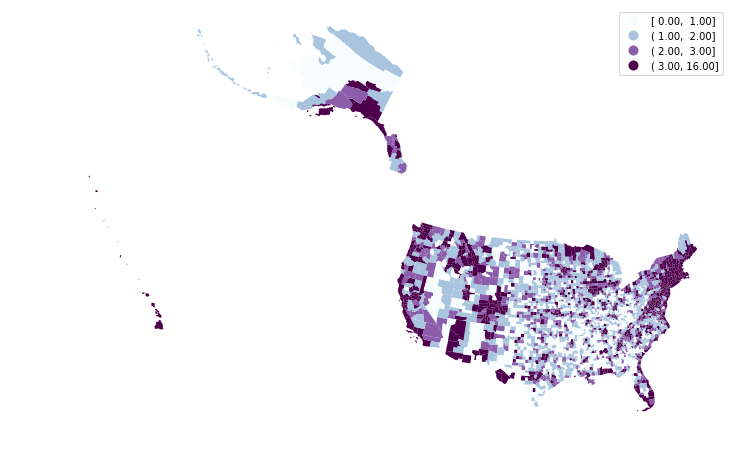

In [123]:
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)

import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(12, 8))
counties_degrees.assign(PercArtsEct=q4.yb).plot(column='PercArtsEct', categorical=True, \
        k=4, cmap='BuPu', linewidth=0, ax=ax, \
        edgecolor='white', legend=True,
                          legend_kwds={'loc': 'upper right'})
ax.set_axis_off()
replace_legend_items(ax.get_legend(), mapping)

# save figure BEFORE you show it
# export map as PDF
plt.savefig("Degrees_ArtsEtc.pdf")

plt.show()a